# Análise da Energia/Eletricidade no Mundo e os seus impactos a nível económico e climático

Datasets encontrados:<br> <br>
1. co2-per-capita-vs-renewable-electricity
2. primary-energy-source-bar
3. SYB64_263_202110_Production Trade and Supply of Energy
4. global-electricity-per-kwh-pricing-2021


## Perguntas a responder
● Países que consomem mais energia pouco poluente (renovável + nuclear);

● Países que consomem mais energia poluente;

● Países que consomem mais energia nuclear;

● Transição global para energia renovável;

● Países com maior transição para energia renovável;

● Países que consomem mais energia;

● Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

● Países que produzem mais energia;

● Países que exportam mais energia;

● Países que importam mais energia;

● Correlação entre preço da eletricidade e percentagem de eletricidade proveniente de fontes renováveis;


### Descrição dos datasets

In [181]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,.5f}'.format

In [182]:
# Reading and showing head data

energySourceCountry = pd.read_csv("primary-energy-source-bar.csv")
co2PerCapita = pd.read_csv("co2-per-capita-vs-renewable-electricity.csv")
productionAndSupplyEnergy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding='latin-1')
electricityPrice2021 = pd.read_excel("global-electricity-per-kwh-pricing-2021.xlsx")


#### Pergunta 1: Quais são os Países que consomem mais energia pouco poluente (renovável + nuclear)?

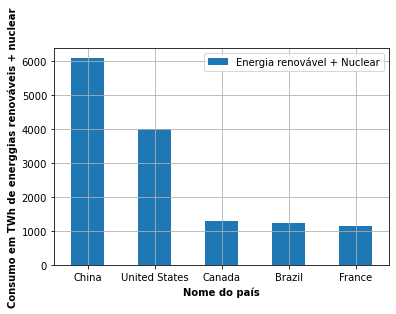

In [190]:
countryEnergy = energySourceCountry
countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']

countryEnergy = countryEnergy.sort_values(by=['renewable_nuclear'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)].iloc[1:6]
countryEnergy.plot.bar(x='Entity', y='renewable_nuclear', rot=0, grid=True)
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energgias renováveis + nuclear', fontweight='bold')
plt.legend(['Energia renovável + Nuclear'])
plt.show()

In [ ]:
co2PerCapita

In [ ]:
productionAndSupplyEnergy

In [ ]:
electricityPrice2021